# Section 02: Geometries


In [9]:
library(tidyverse)

mtcars <- read.csv("..\\00_Datasets\\mtcars_v2.csv", header=TRUE)
str(mtcars)

'data.frame':	32 obs. of  14 variables:
 $ X   : chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: int  4 4 1 1 2 1 4 2 2 4 ...
 $ fcyl: int  6 6 4 6 8 6 8 4 4 6 ...
 $ fam : chr  "manual" "manual" "manual" "automatic" ...


### `01-Overplotting 1: large datasets`

Add a points layer to the base plot.
- Set the point transparency to `0.5`.
- Set `shape = "."`, the point size of 1 pixel.

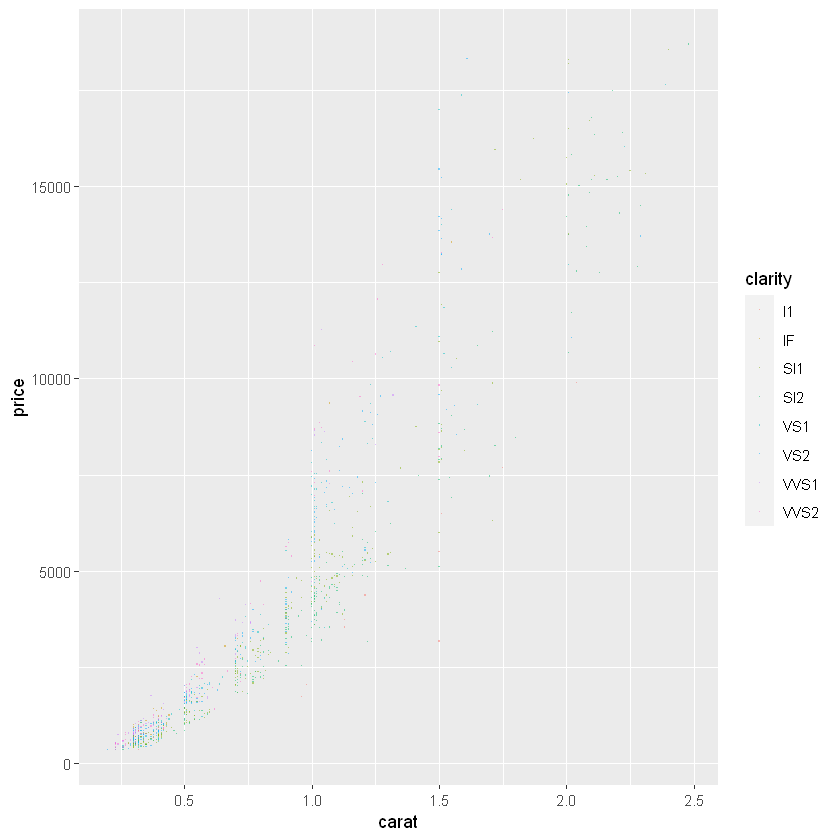

In [10]:
# Plot price vs. carat, colored by clarity
plt_price_vs_carat_by_clarity <- ggplot(diamonds, aes(carat, price, color = clarity))

# Set transparency to 0.5
plt_price_vs_carat_by_clarity + geom_point(alpha = 0.5, shape = ".")

- Update the point shape to remove the line outlines by setting `shape` to `16`.

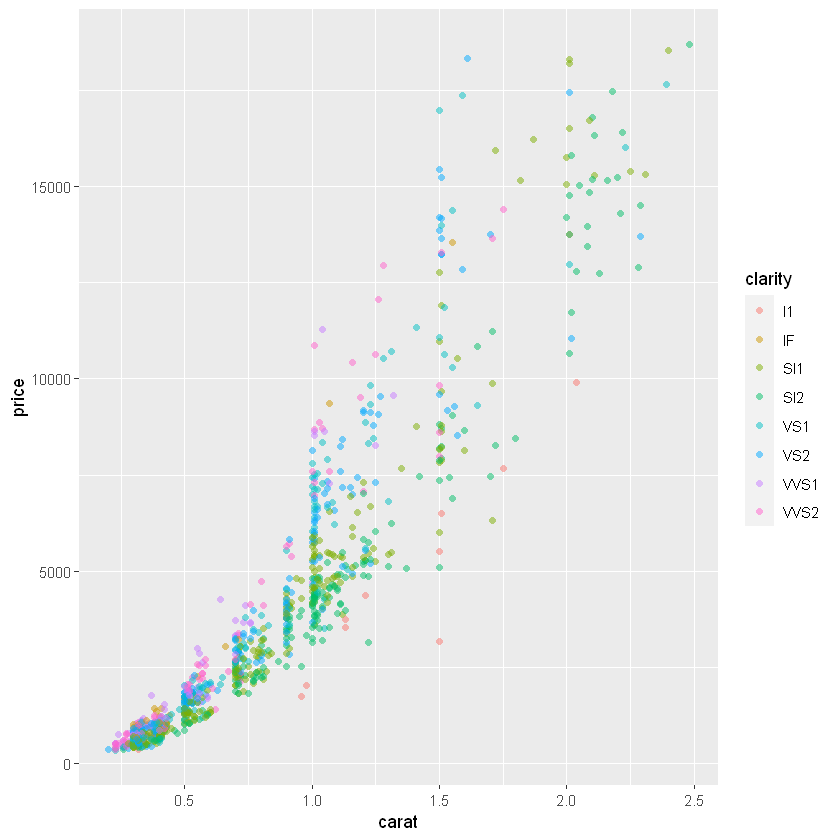

In [11]:
# Plot price vs. carat, colored by clarity
plt_price_vs_carat_by_clarity <- ggplot(diamonds, aes(carat, price, color = clarity))

# Set transparency to 0.5
plt_price_vs_carat_by_clarity + geom_point(alpha = 0.5, shape = 16)

### `02-Overplotting 2: Aligned values`

- Create a base plot `plt_mpg_vs_fcyl_by_fam` of `fcyl` by `mpg`, colored by `fam`.
- Add a points layer to the base plot.

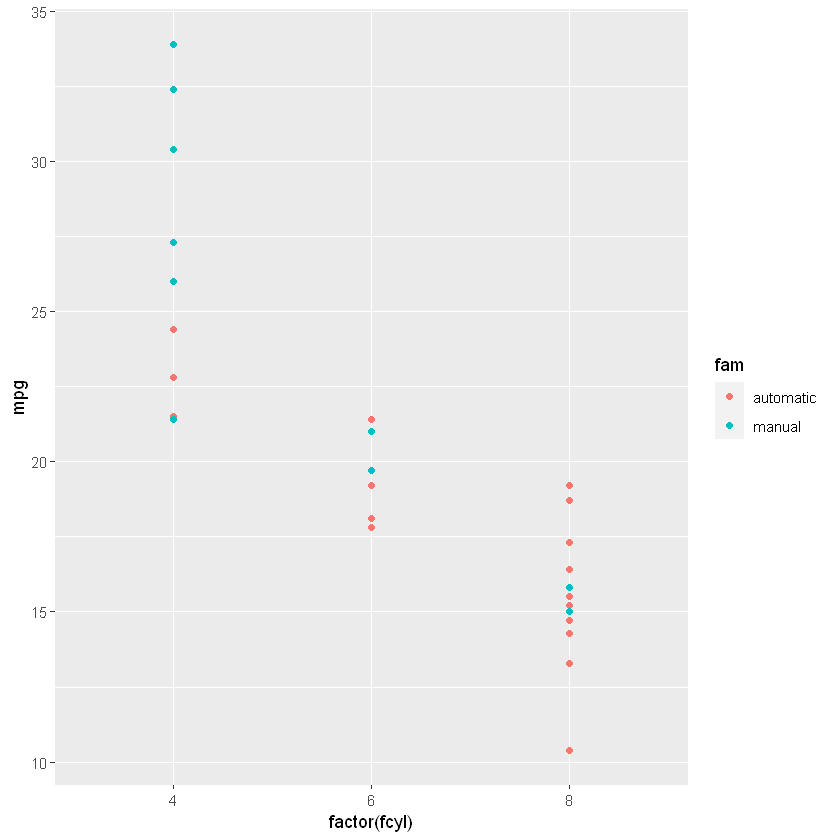

In [13]:
# Plot base
plt_mpg_vs_fcyl_by_fam <- ggplot(mtcars, aes(factor(fcyl), mpg, color = fam))

# Default points are shown for comparison
plt_mpg_vs_fcyl_by_fam + geom_point()

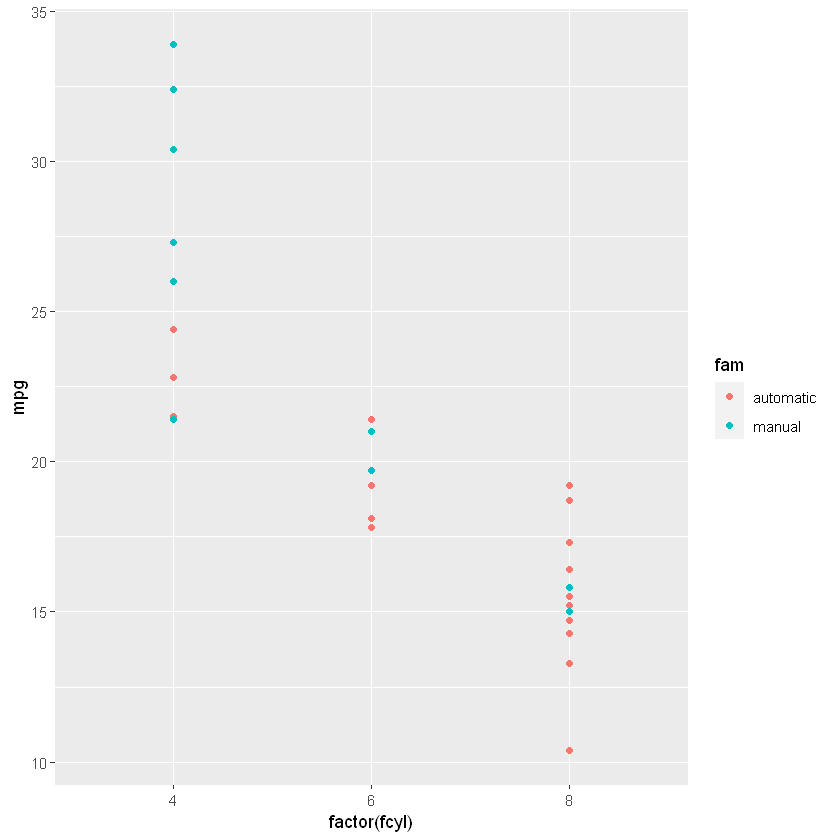

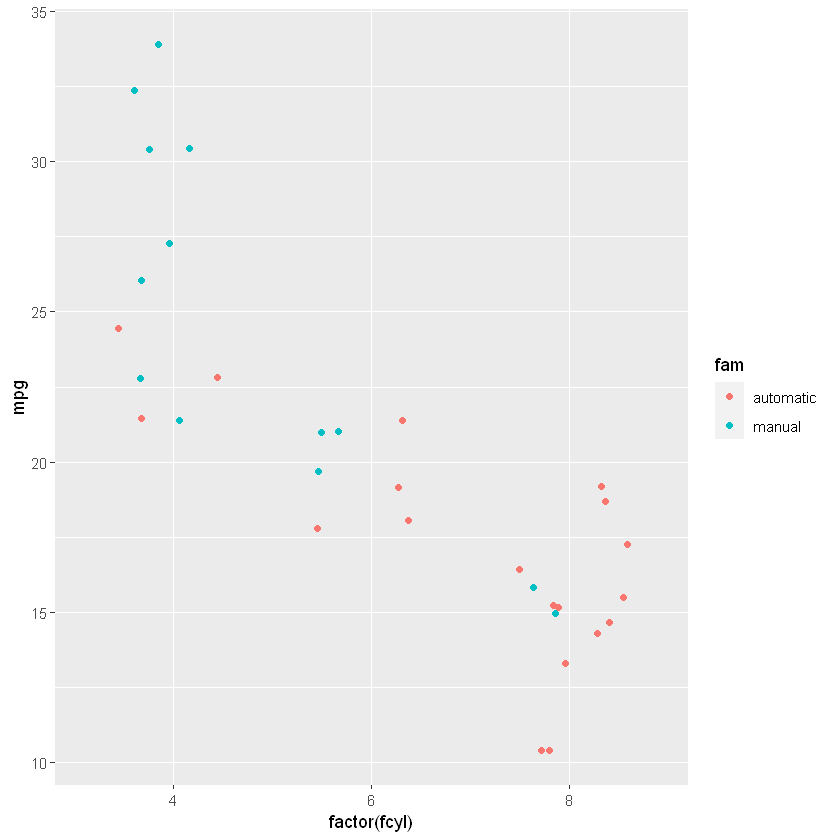

In [18]:
# Plot base
plt_mpg_vs_fcyl_by_fam <- ggplot(mtcars, aes(factor(fcyl), mpg, color = fam))

# Default points are shown for comparison
plt_mpg_vs_fcyl_by_fam + geom_point()

# Alter the point positions by jittering, width 0.3
plt_mpg_vs_fcyl_by_fam + geom_point(position = position_jitter(width = 0.3))

- Alternatively, use `position_jitterdodge()`. Set `jitter.width` and `dodge.width` to `0.3` to separate subgroups further.

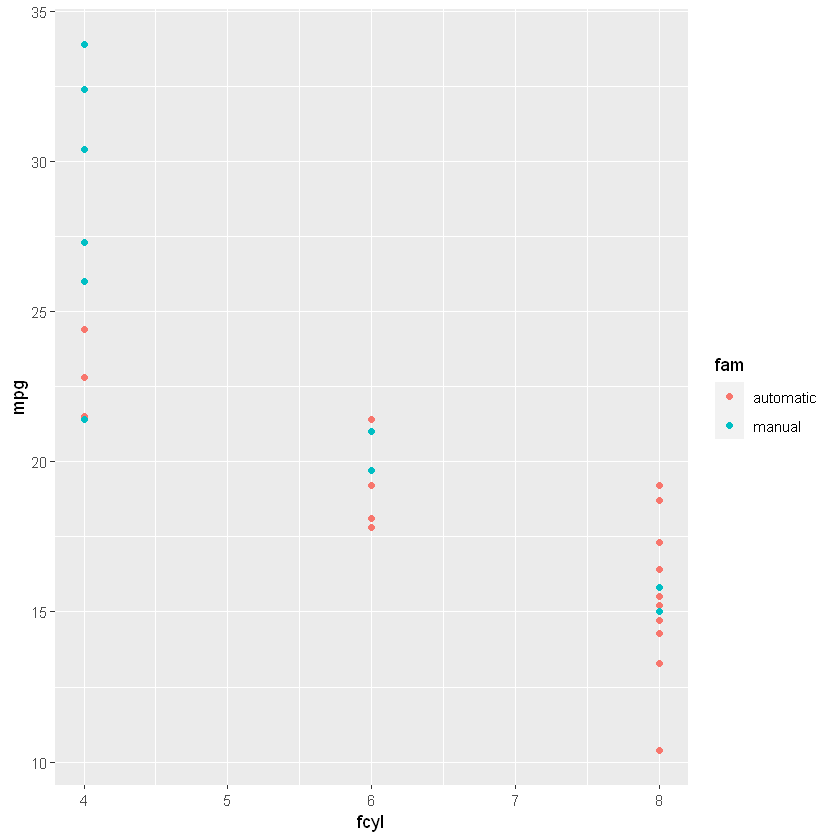

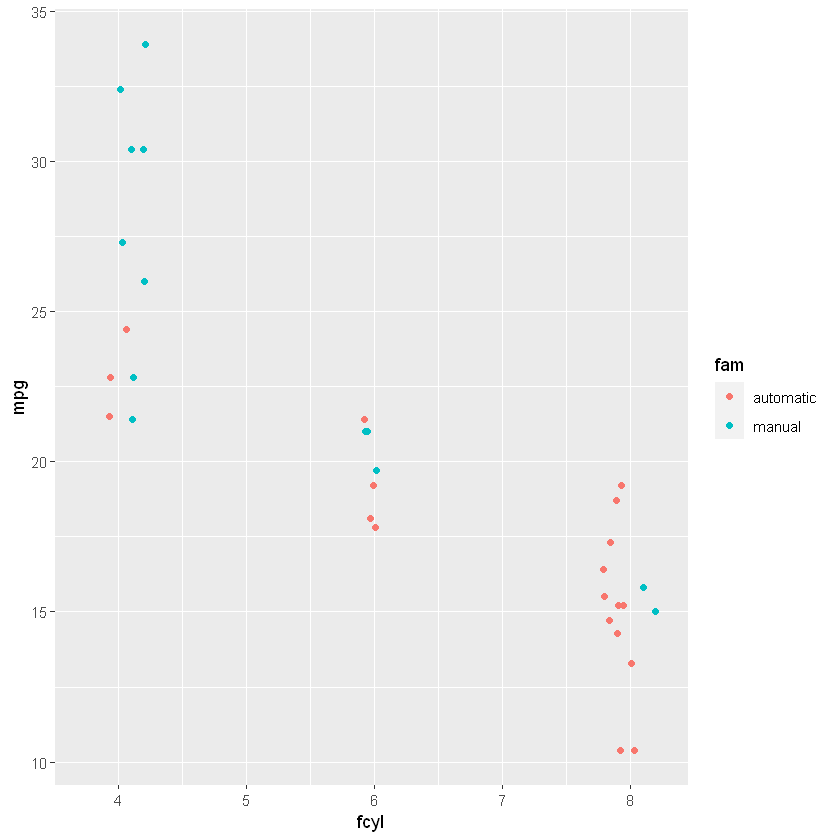

In [19]:
# Plot base
plt_mpg_vs_fcyl_by_fam <- ggplot(mtcars, aes(fcyl, mpg, color = fam))

# Default points are shown for comparison
plt_mpg_vs_fcyl_by_fam + geom_point()

# Now jitter and dodge the point positions
plt_mpg_vs_fcyl_by_fam + geom_point(position = position_jitterdodge(jitter.width = 0.3, dodge.width = 0.3))

### `03-Overplotting 3: Low-precision data`

In [20]:
library(datasets)
data(iris)
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

- Change the points layer into a jitter layer.
- Reduce the jitter layer's `width` by setting the width argument to `0.1`.

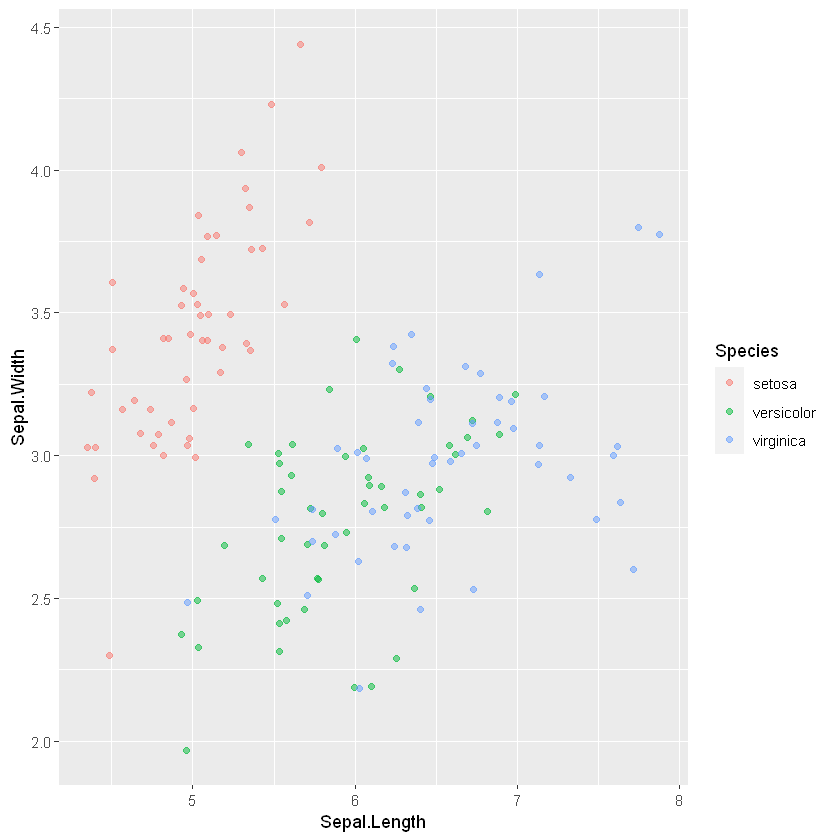

In [22]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Swap for jitter layer with width 0.1
  geom_jitter(alpha = 0.5, width = 0.1)

Let's use a different approach:
- Within `geom_point()`, set `position` to `"jitter"`.

Warning message:
"Duplicated aesthetics after name standardisation: alpha"


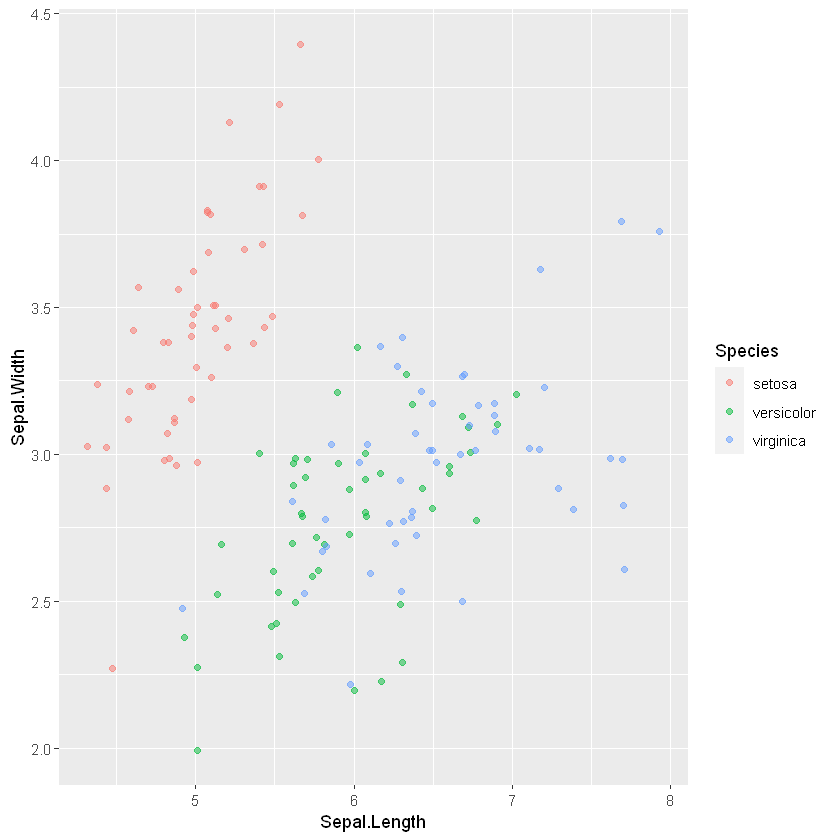

In [23]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Set the position to jitter
  geom_point(alpha = 0.5, alpha = 0.1, position = "jitter")

- Provide an alternative specification

- Have the `position` argument call `position_jitter()` with a `width` of `0.1`.

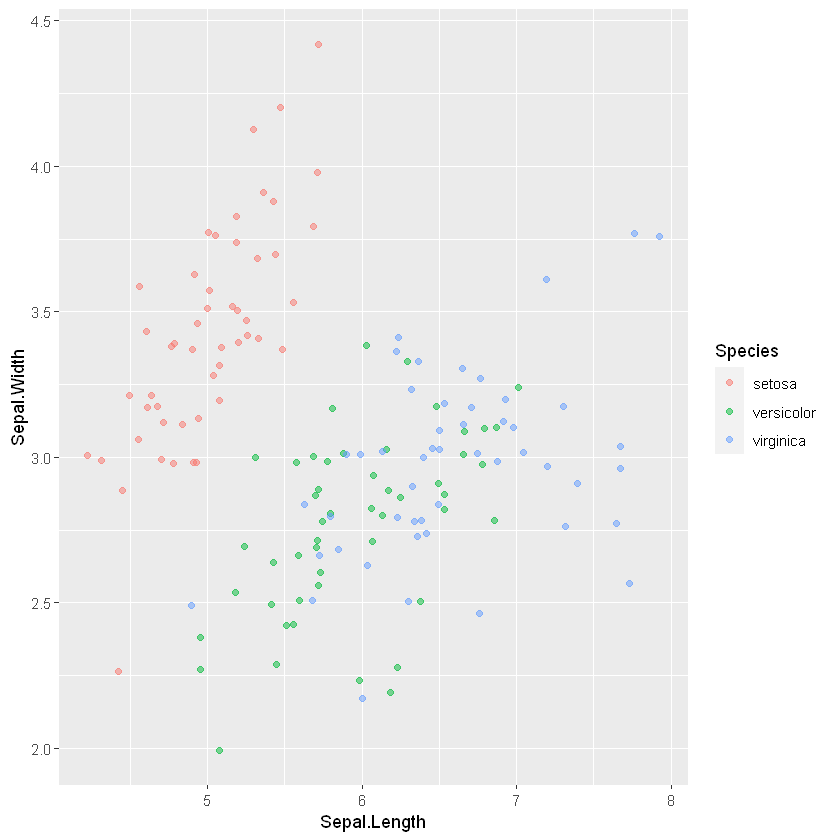

In [24]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Use a jitter position function with width 0.1
  geom_point(alpha = 0.5, position = position_jitter( width = 0.1))

### `04-Overplotting 4: Integer data`
- Examine the `Vocab` dataset using `str()`.
- Using `Vocab`, draw a plot of `vocabulary` vs `education`.
- Add a point layer.

In [25]:
Vocab <- read.csv("..\\00_Datasets\\Vocab.csv", header=TRUE)
str(Vocab)

'data.frame':	21638 obs. of  4 variables:
 $ year      : int  2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 ...
 $ sex       : chr  "Female" "Female" "Male" "Female" ...
 $ education : int  9 14 14 17 14 14 12 10 11 9 ...
 $ vocabulary: int  3 6 9 8 1 7 6 6 5 1 ...


'data.frame':	21638 obs. of  4 variables:
 $ year      : int  2004 2004 2004 2004 2004 2004 2004 2004 2004 2004 ...
 $ sex       : chr  "Female" "Female" "Male" "Female" ...
 $ education : int  9 14 14 17 14 14 12 10 11 9 ...
 $ vocabulary: int  3 6 9 8 1 7 6 6 5 1 ...


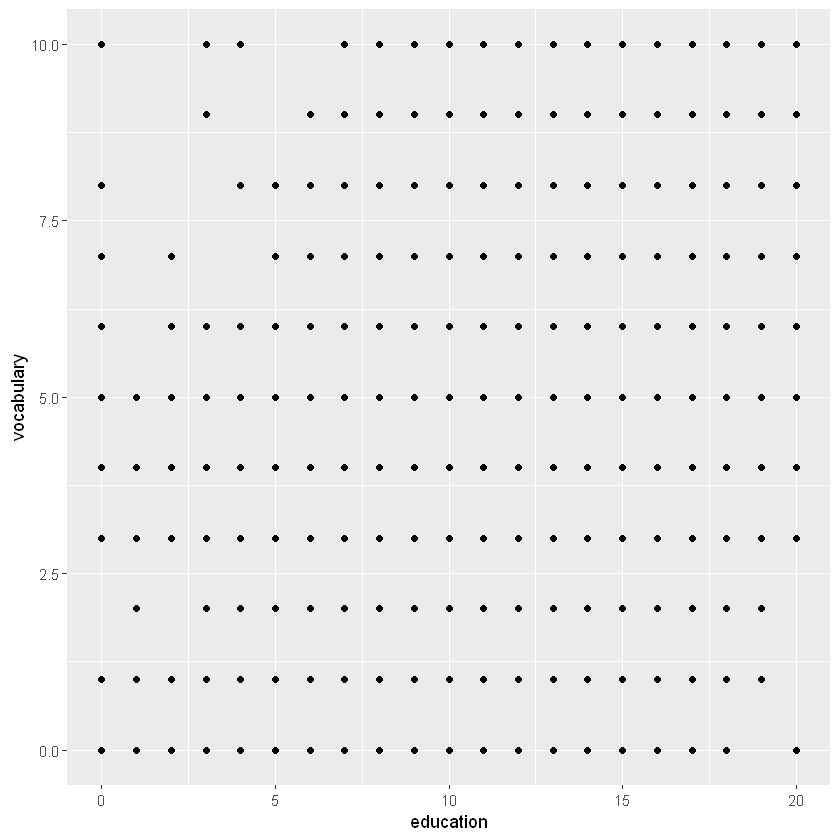

In [26]:
# Examine the structure of Vocab
str(Vocab)

# Plot vocabulary vs. education
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  # Add a point layer
  geom_point()

- Replace the point layer with a jitter layer.




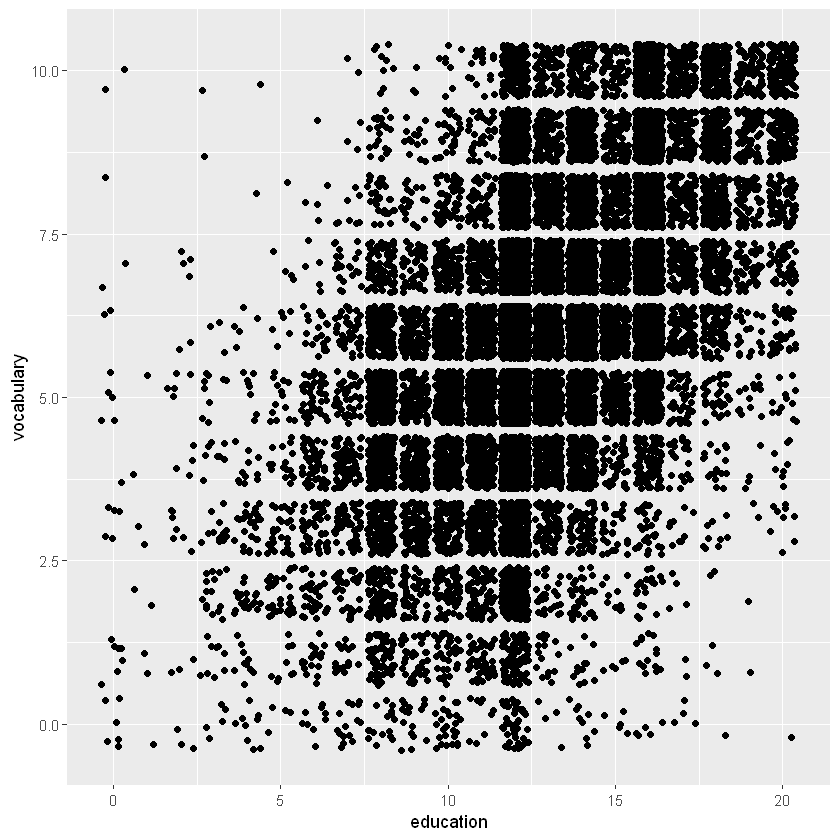

In [27]:
ggplot(Vocab, aes(education, vocabulary)) +
  # Change to a jitter layer
  geom_jitter()

- Set the jitter transparency to `0.2`.

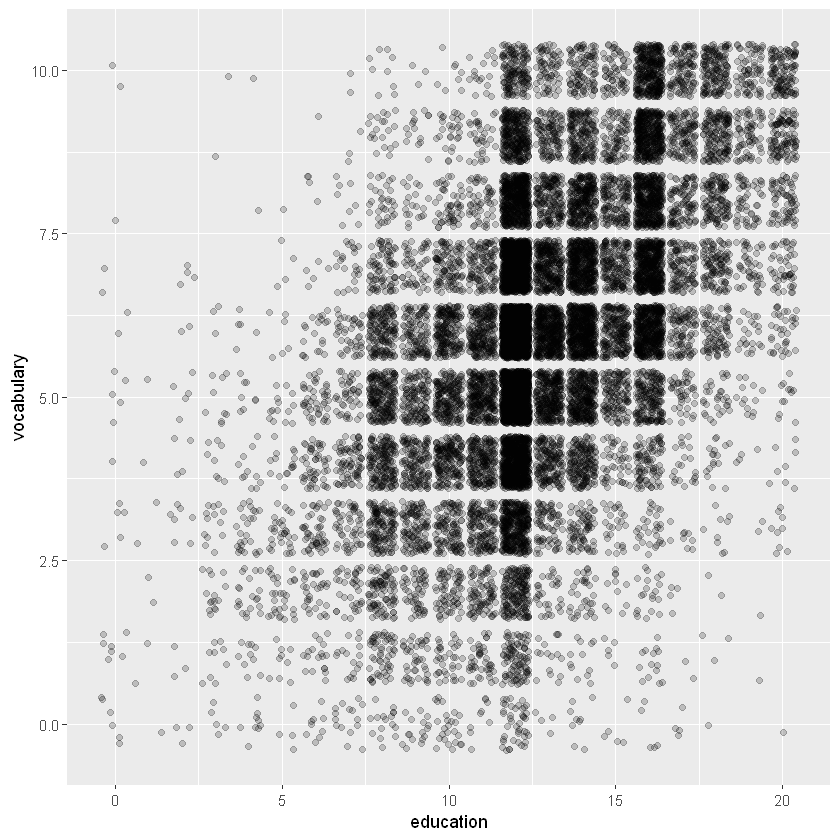

In [28]:
ggplot(Vocab, aes(education, vocabulary)) +
  # Set the transparency to 0.2
  geom_jitter(alpha = 0.2)

- Set the shape of the jittered points to hollow circles, (shape `1`).

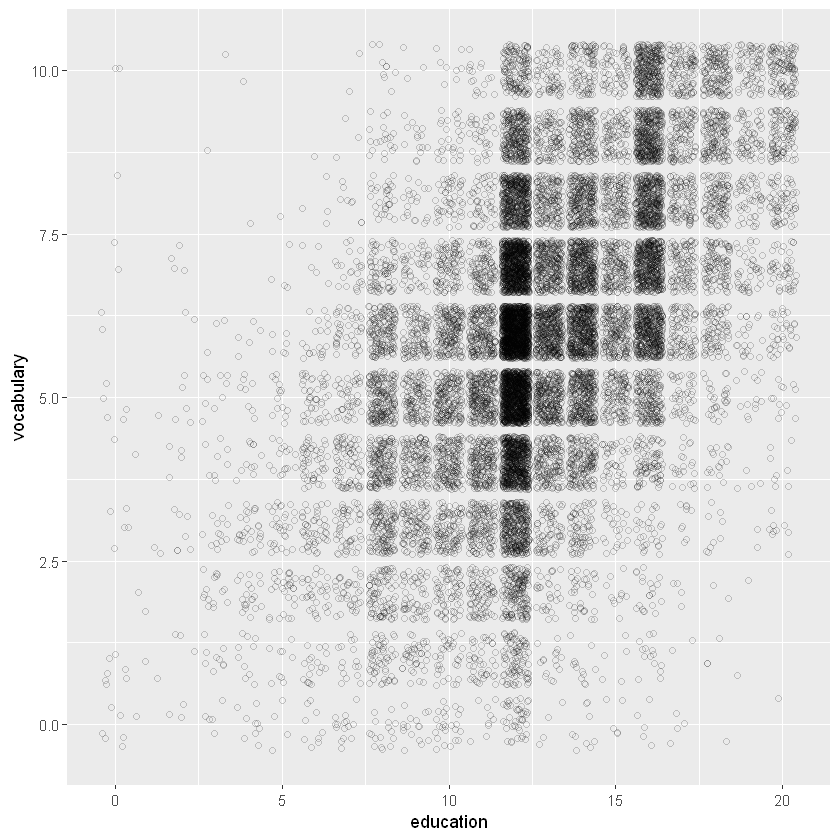

In [29]:
ggplot(Vocab, aes(education, vocabulary)) +
  # Set the shape to 1
  geom_jitter(alpha = 0.2, shape = 1)

### `05-Histograms`

- Using `mtcars`, map `mpg` onto the x aesthetic.
- Add a histogram layer using `geom_histogram()`
- Set the histogram `binwidth` to `1`.
- Map `y` to the internal variable ..`density`.. to show frequency densities.
- Set the `fill` color of the histogram bars to `datacamp_light_blue`.

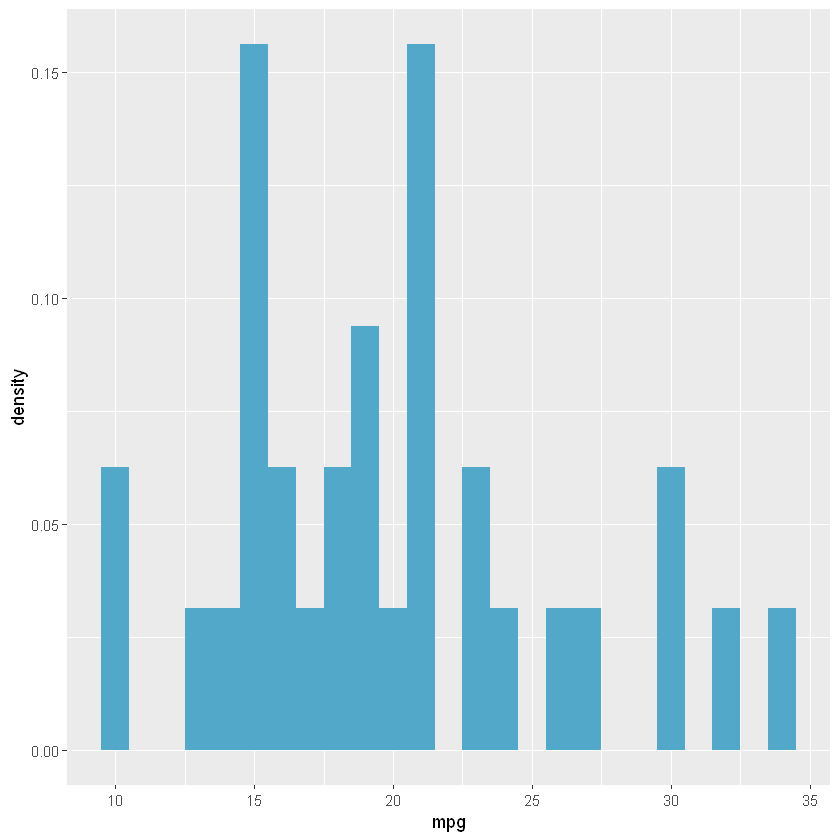

In [31]:
datacamp_light_blue <- "#51A8C9"

ggplot(mtcars, aes(mpg, ..density..)) +
  # Set the fill color to datacamp_light_blue
  geom_histogram(binwidth = 1, fill = datacamp_light_blue)

### `06-Positions in histograms`

Here, we'll examine the various ways of applying positions to histograms. `geom_histogram()`, a special case of `geom_bar()`, has a `position` argument that can take on the following values:

- `stack` (the default): Bars for different groups are stacked on top of each other.
- `dodge`: Bars for different groups are placed side by side.
- `fill`: Bars for different groups are shown as proportions.
- `identity`: Plot the values as they appear in the dataset.

#### `Questions:` 
- Update the aesthetics so that the fill color of the bars is determined by `fam`.

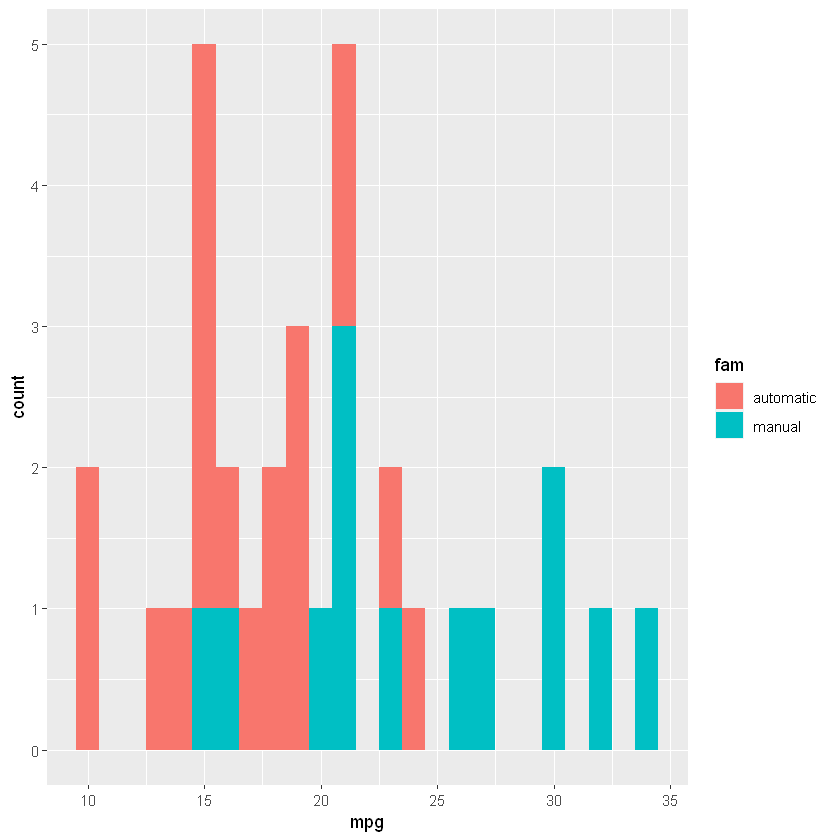

In [32]:
# Update the aesthetics so the fill color is by fam
ggplot(mtcars, aes(mpg, fill = fam)) +
  geom_histogram(binwidth = 1)

- Update the histogram layer to position the bars side-by-side, that is, `"dodge"`.

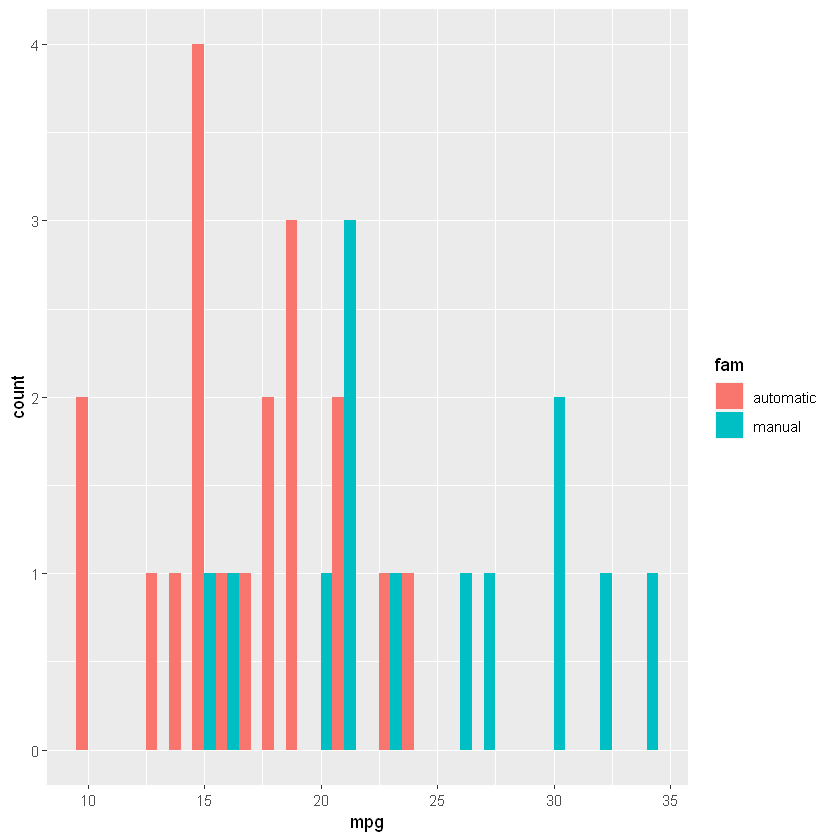

In [33]:
ggplot(mtcars, aes(mpg, fill = fam)) +
  # Change the position to dodge
  geom_histogram(binwidth = 1, position = "dodge")

- Update the histogram layer so the bars' positions `"fill"` the y-axis.

Warning message:
"Removed 16 rows containing missing values (geom_bar)."


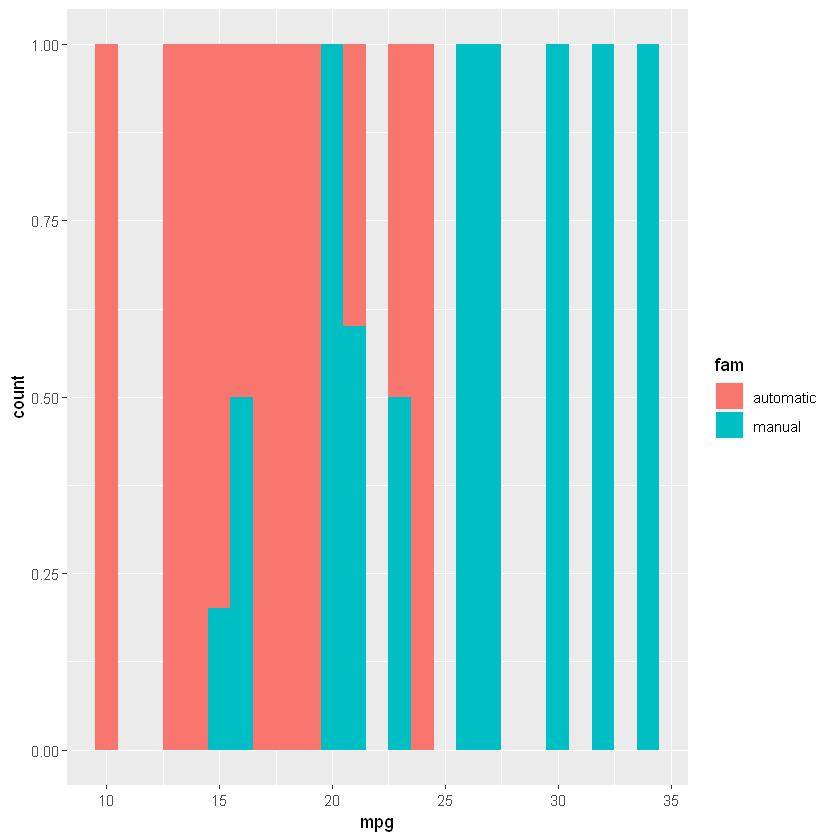

In [34]:
ggplot(mtcars, aes(mpg, fill = fam)) +
  # Change the position to identity, with transparency 0.4
  geom_histogram(binwidth = 1, position = "fill")

- Update the histogram layer so bars are top of each other, using the `"identity"` position. So each bar can be seen, set `alpha` to `0.4`.

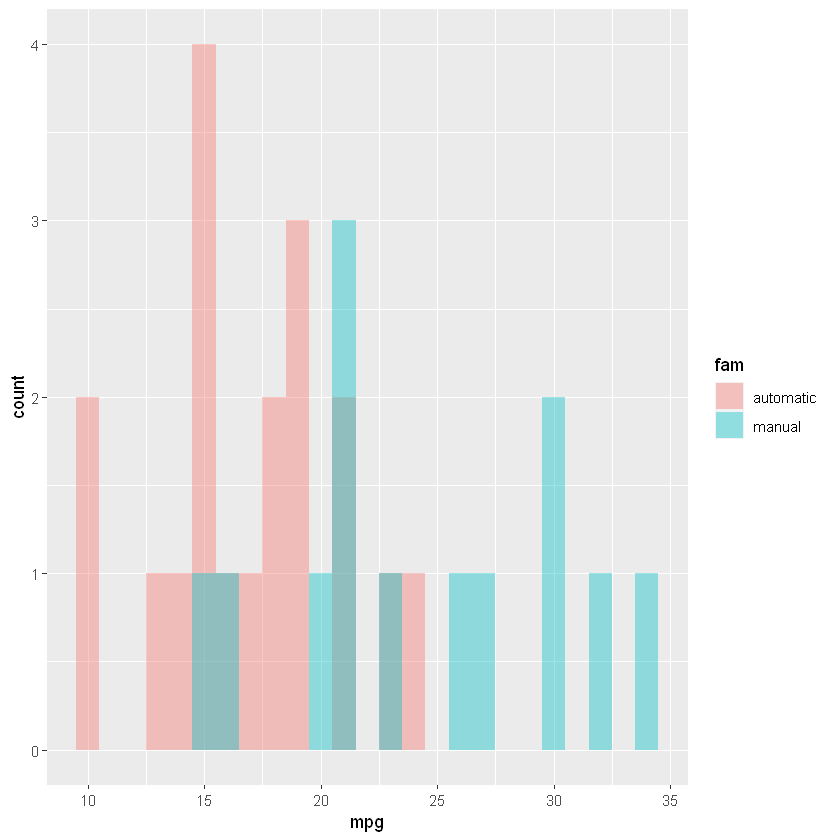

In [37]:
ggplot(mtcars, aes(mpg, fill = fam)) +
  # Change the position to identity, with transparency 0.4
  geom_histogram(binwidth = 1, position = "identity", alpha = 0.4)

### `07-Position in bar and col plots`

- Using `mtcars`, plot `fcyl`, filled by `fam`.
- Add a bar layer using `geom_bar()`.

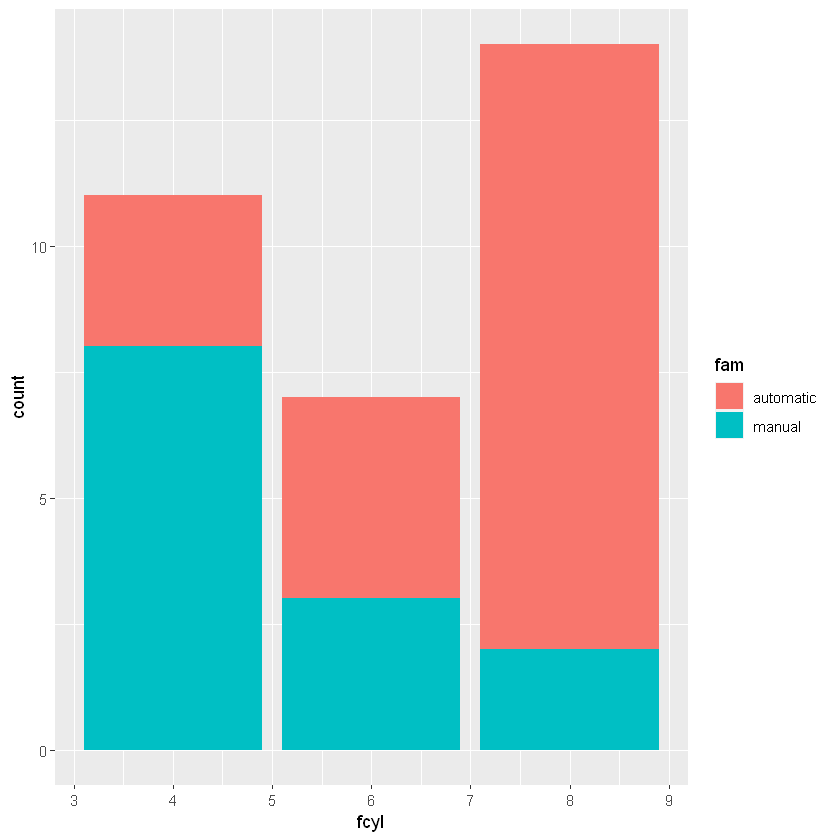

In [38]:
# Plot fcyl, filled by fam
ggplot(mtcars, aes(fcyl, fill = fam)) +
  # Add a bar layer
  geom_bar()

- Set the bar `position` argument to `"fill"`.

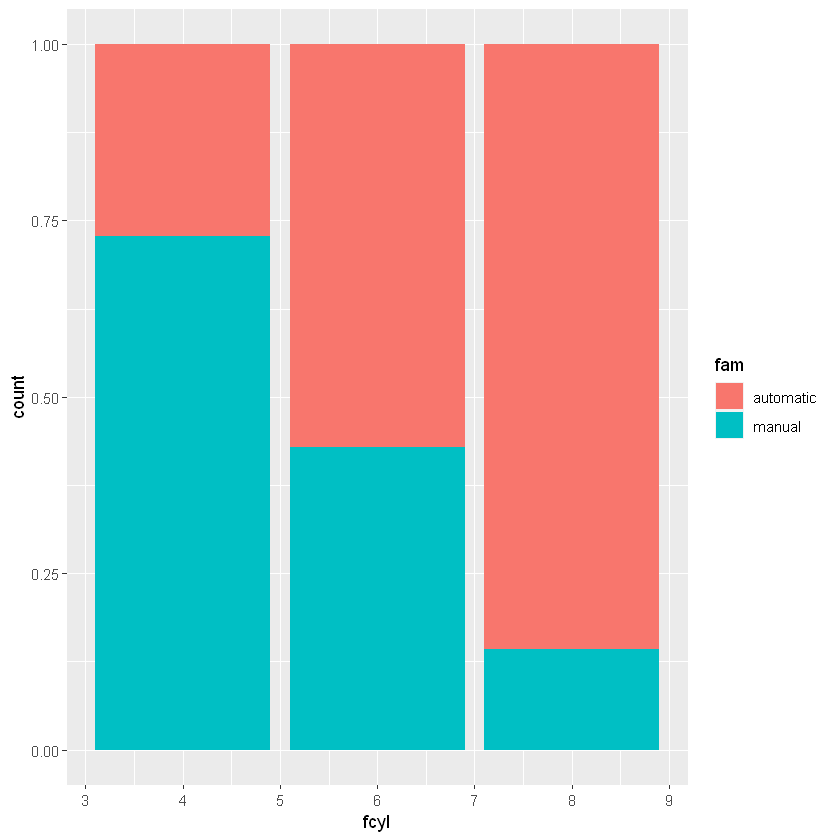

In [39]:
ggplot(mtcars, aes(fcyl, fill = fam)) +
  # Change the position to "dodge"
  geom_bar(position = "fill")

- Change the bar `position` argument to `"dodge"`.

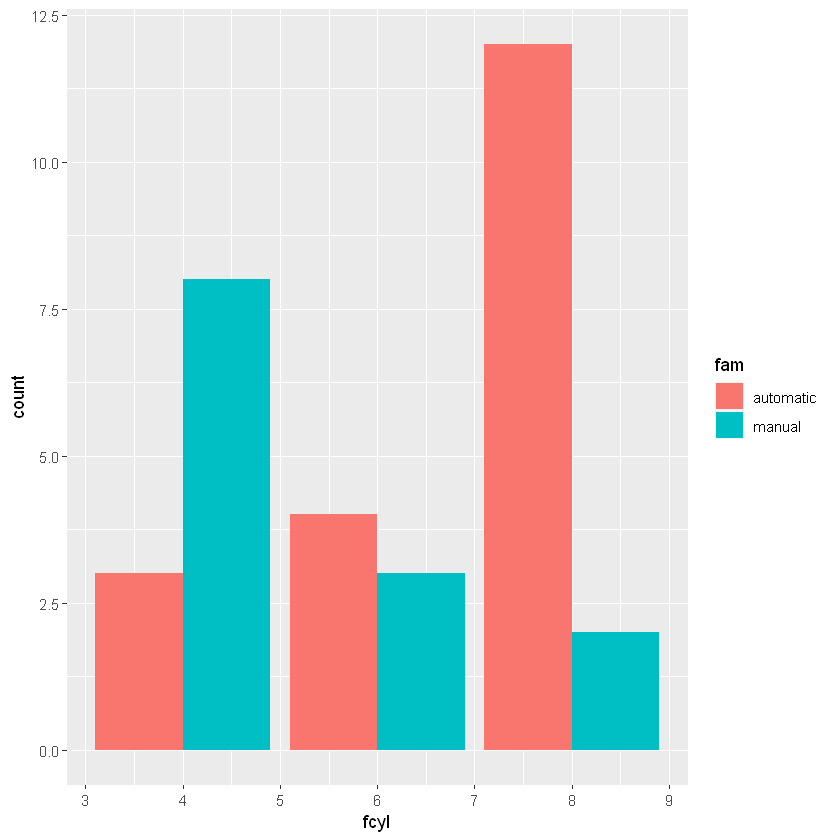

In [40]:
ggplot(mtcars, aes(fcyl, fill = fam)) +
  # Change the position to "dodge"
  geom_bar(position = "dodge")

### `08-Overlapping bar plots`

- Use the functional form of the bar position: replace `"dodge"` with a call to `position_dodge()`.
- Set its `width` to `0.2`.

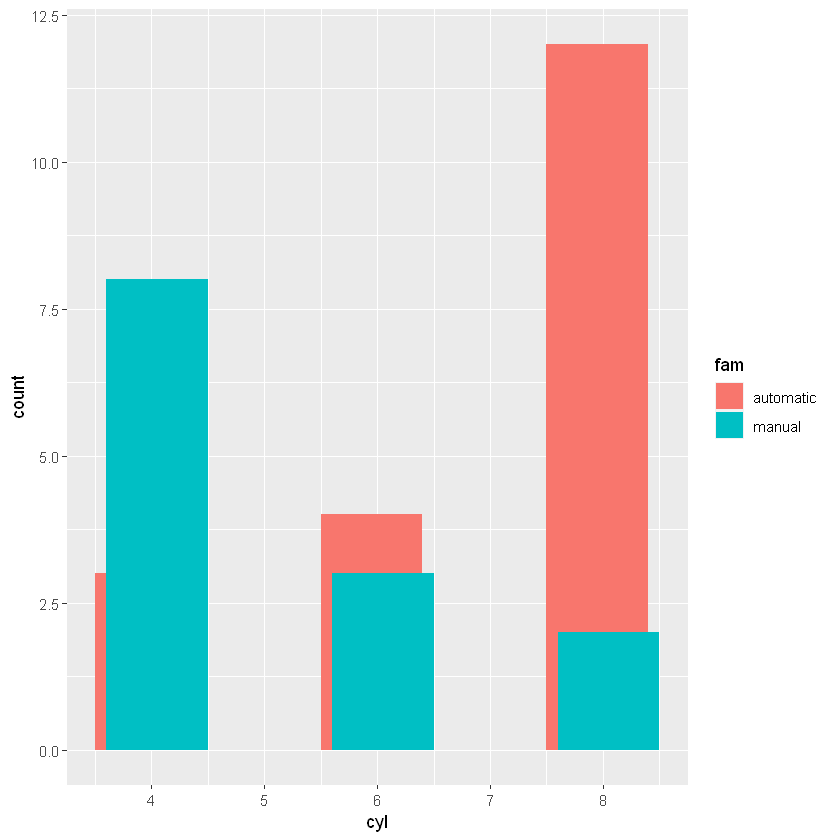

In [41]:
ggplot(mtcars, aes(cyl, fill = fam)) +
  # Set the transparency to 0.6
  geom_bar(position = position_dodge(width = 0.2))

- Set the bar transparency level of the bars to `0.6`.

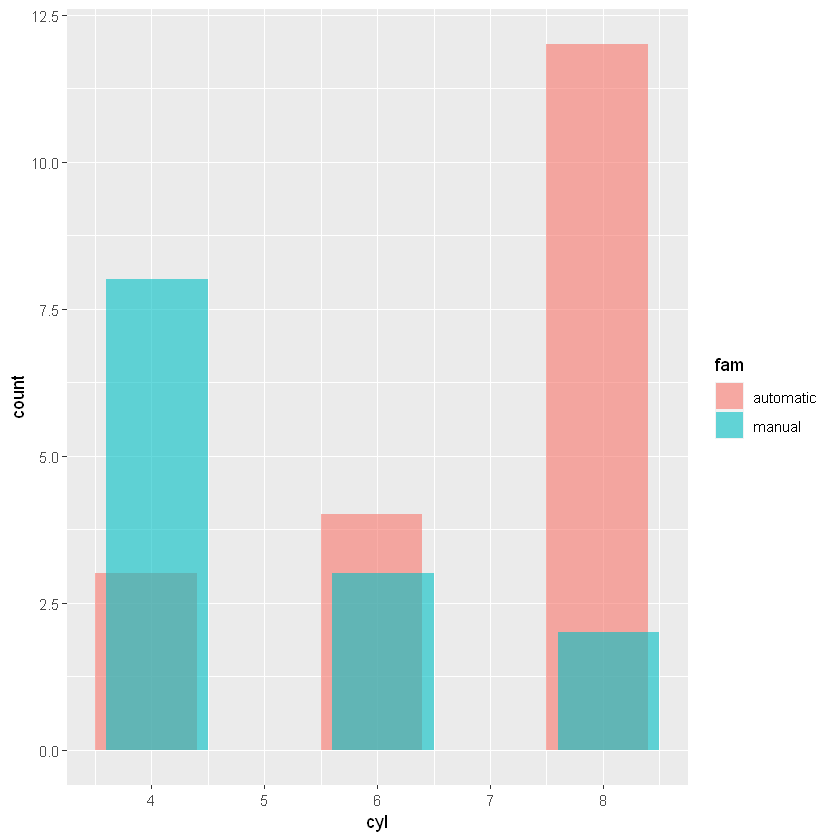

In [42]:
ggplot(mtcars, aes(cyl, fill = fam)) +
  # Set the transparency to 0.6
  geom_bar(position = position_dodge(width = 0.2),alpha = 0.6)

### `09-Bar plots: sequential color palette`
`In the exercise, you'll use similar code on the the Vocab dataset. Both datasets are ordinal.`

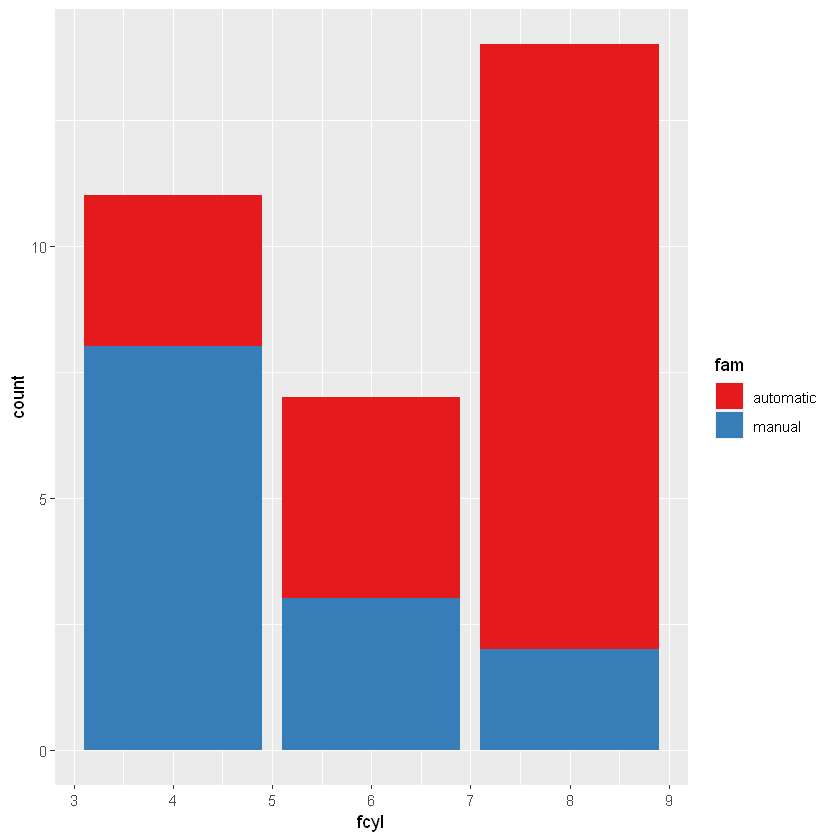

In [43]:
ggplot(mtcars, aes(fcyl, fill = fam)) +
  geom_bar() +
  scale_fill_brewer(palette = "Set1")

- Plot the `Vocab` dataset, mapping `education` onto `x` and `vocabulary` onto `fill`.
- Add a bar layer, setting `position` to `"fill"`.
- Add a brewer fill scale, using the default palette (don't pass any arguments). Notice how this generates a warning message and an incomplete plot.




Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
"


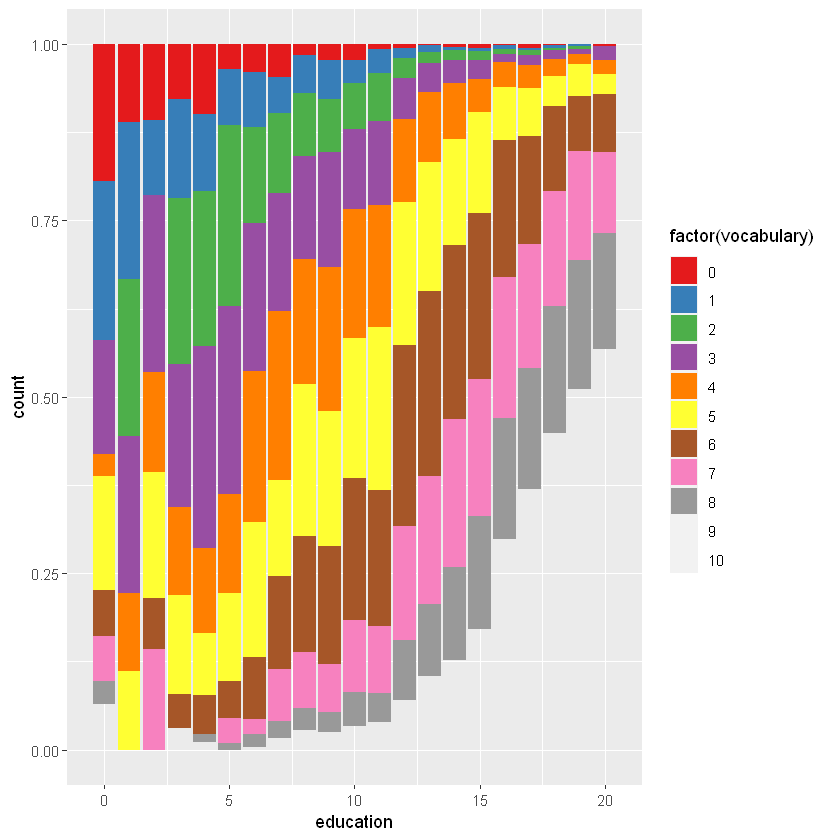

In [57]:
# Plot education, filled by vocabulary
ggplot(Vocab, aes(education, fill = factor(vocabulary))) +
  # Add a bar layer with position "fill"
  geom_bar(position = "fill") +
  # Add a brewer fill scale with default palette
  scale_fill_brewer(palette = "Set1")

In [60]:
library(datasets)
data(beaver2)

Warning message in data(beaver2):
"data set 'beaver2' not found"
